In [1]:
from Ownkey import API_Key
import requests
import pandas as pd

print(API_Key)

/Users/edgarrios/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


oO8KIezkyYTwkyCiTUdu55PA7LSM5Q8Q


In [2]:
ticker = "X:BTCUSD"
multiplier = 1
timespan = "day"
start_date = "2024-01-09"
end_date = "2024-12-10"

url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/{multiplier}/{timespan}/{start_date}/{end_date}?apiKey={API_Key}"

#print(url)

response = requests.get(url)
data = response.json()

if "results" in data:
    df = pd.DataFrame(data["results"])

    df['t'] = pd.to_datetime(df['t'], unit='ms')

    df.rename(columns={'t': 'Date', 'o': 'Open', 'h': 'High', 'l': 'Low', 'c': 'Close', 'v': 'Volume'}, inplace=True)

    print(df.head())
else:
    print("Error fetching data:", data)

         Volume          vw      Open     Close      High       Low  \
0  38524.350057  46491.2035  46989.50  46124.08  47988.00  44500.00   
1  49773.358263  45878.5148  46120.79  46666.11  47732.50  44268.00   
2  50944.645338  46947.4415  46654.00  46350.40  49102.29  45555.55   
3  59970.952736  44196.8707  46350.40  42773.03  46522.20  41444.97   
4  13737.624864  42831.5723  42775.10  42839.33  43250.00  42427.00   

        Date       n  
0 2024-01-09  656435  
1 2024-01-10  738646  
2 2024-01-11  762583  
3 2024-01-12  791172  
4 2024-01-13  315568  


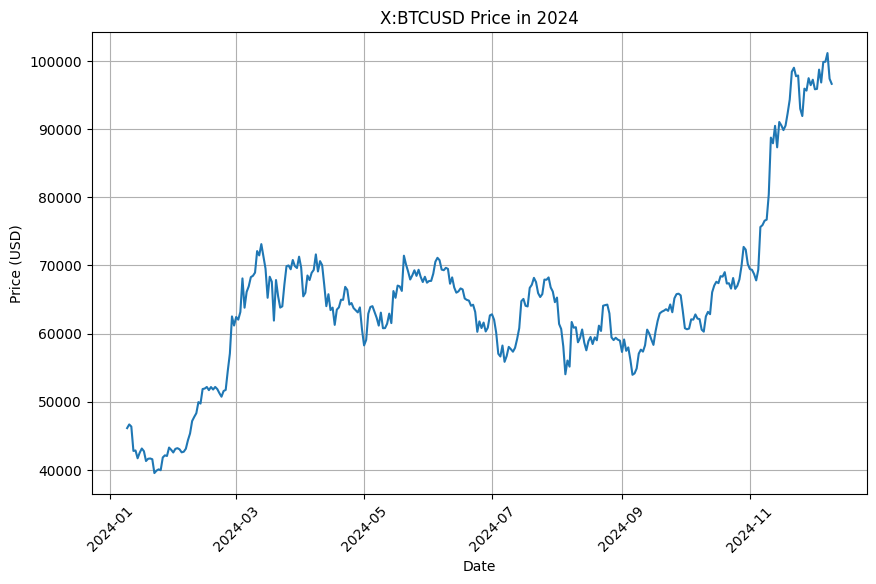

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'])
plt.title(f"{ticker} Price in 2024")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()